In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [12]:
drop_params = [('score_var', 'boll2_40'), ('score_var', 'boll4_160'), 
               ('score_var', 'boll_40'), ('score_var', 'prma_3_100')]

run1 = RunManager('StatArbStrategy', 'run_0148', drop_params=drop_params)

In [13]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,96,0.679727,0.040859,-999.0
1,data_rank_flag,True,96,0.669120,0.041923,-999.0
2,drop_binaries,False,96,0.687132,0.042224,-999.0
3,drop_binaries,True,96,0.661715,0.040558,-999.0
4,holding_period,3,64,0.803518,0.047704,-999.0
5,holding_period,5,64,0.646205,0.039872,-999.0
6,holding_period,7,64,0.573549,0.036596,-999.0
7,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",192,0.674424,0.041391,-999.0
8,per_side_count,10,96,0.718680,0.038473,-999.0
9,per_side_count,20,96,0.630168,0.044308,-999.0


In [14]:
# Create combo search
comb1 = CombinationSearch()
comb1.set_selection_criteria('sharpe')
comb1.params['training_epochs'] = 20

comb1.add_run(run1)
comb1.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [03:36<00:00, 10.84s/it]


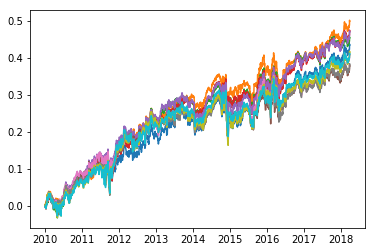

In [15]:
plt.figure()
plt.plot(comb1.best_results_returns.dropna().cumsum())
plt.show()

In [16]:
df = rollup_returns(comb1.best_results_returns.dropna())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.002408,0.003799,0.042726,0.028221,0.077154
2011,0.013708,0.017063,-0.065148,0.079703,0.045325
2012,0.018736,0.006361,0.041184,0.005121,0.071402
2013,0.012188,0.019595,0.023688,-0.020947,0.034524
2014,-0.019827,0.034979,0.029344,-0.043715,0.000781
2015,0.004111,0.025084,0.009654,0.028741,0.067591
2016,0.004270,-0.003296,0.041261,0.008029,0.050265
2017,0.010740,0.018501,0.027433,-0.012726,0.043948
2018,0.042812,NaN,NaN,NaN,0.042812


In [17]:
# Sector 20 baseline
drop_params = [('data_rank_flag', True), ('per_side_count', 20)]
run2 = RunManager('StatArbStrategy', 'run_0161', drop_params=drop_params)

In [18]:
# Create combo search
comb2 = CombinationSearch()
comb2.set_selection_criteria('sharpe')
comb2.params['training_epochs'] = 20

comb2.add_run(run2)
comb2.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [03:16<00:00,  9.80s/it]


In [19]:
df = rollup_returns(comb2.best_results_returns.dropna())
df['yr'] = df.sum(axis=1)
df

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.054923,-0.008767,0.082178,-0.013717,0.114616
2011,0.054231,0.024739,-0.012659,0.108626,0.174937
2012,0.039241,0.013409,0.036405,0.076464,0.165519
2013,-0.016772,0.021500,0.050475,0.042631,0.097833
2014,0.036163,0.048638,0.014271,-0.013072,0.086000
2015,0.011033,0.049982,-0.040629,0.036907,0.057293
2016,0.083559,-0.002565,0.018503,0.046737,0.146235
2017,0.036540,0.064876,-0.005112,0.030913,0.127216
2018,0.037611,-0.013914,NaN,NaN,0.023697
